<a href="https://colab.research.google.com/github/tubagus86/IYKRA-Fellowship/blob/master/Practice_case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd # untuk membaca dataset
import numpy as np # untuk perhitungan statistik
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
import plotly.express as px

In [52]:
df_ritz = pd.read_csv('Ritz_Jager_Data.csv')
pd.set_option('display.max_columns', None)

In [53]:
df_ritz.shape

(119390, 32)

In [54]:
# Cek missing values

df_ritz.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Berdasarkan hasil di atas, terdapat missing values pada kolom children, country_origin, agent dan company

# **1. Where do the guest come from ?**

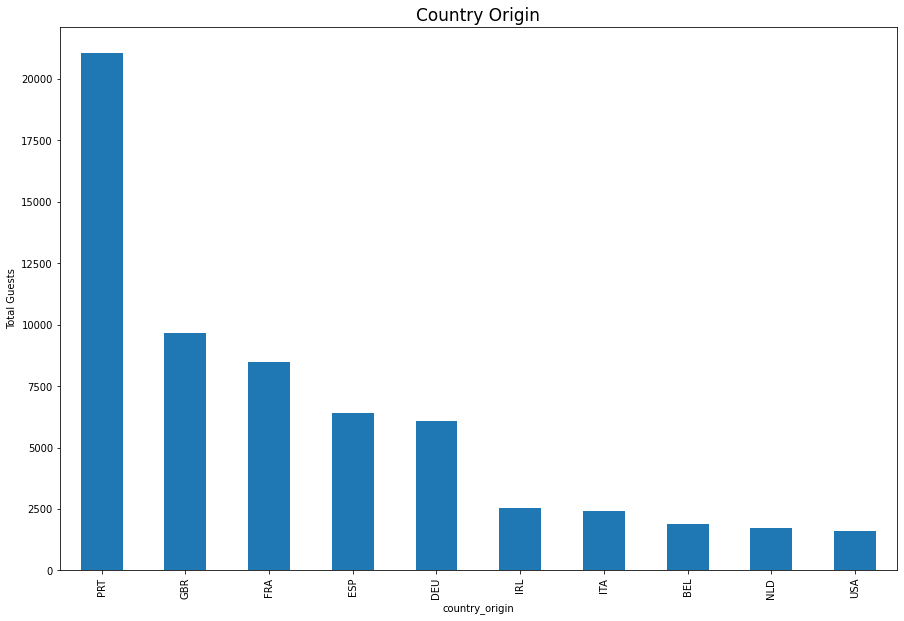

In [55]:
# Filter is_canceled = 0

df_ritz1 = df_ritz[df_ritz.is_canceled.eq(0)]

plt.figure(figsize = (15,10))
plt.title("Country Origin", fontsize = 17)
plt.ylabel("Total Guests")
df_ritz1.groupby(['country_origin']).size().sort_values(ascending= False).head(10).plot.bar()

# **2. How much do guests pay for a room per night?**

In [56]:
df_ritz1['adr'].describe()

count    75166.000000
mean        99.987693
std         49.206263
min         -6.380000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

Berdasarkan hasil di atas terdapat 'adr' dibawah '0' karena tidak mungkin rata-rata harga per malam dibawah '0' maka perlu di filter 'adr' lebih besar dari '0'

In [57]:
df_ritz11 = df_ritz1.loc[df_ritz1['adr'] >0]

df_ritz11.adr.describe()


count    73419.000000
mean       102.366980
std         47.278936
min          0.260000
25%         70.000000
50%         94.500000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Sudah terlihat 'adr' paling kecil di 0.26

Text(0, 0.5, 'Average Daily Rate')

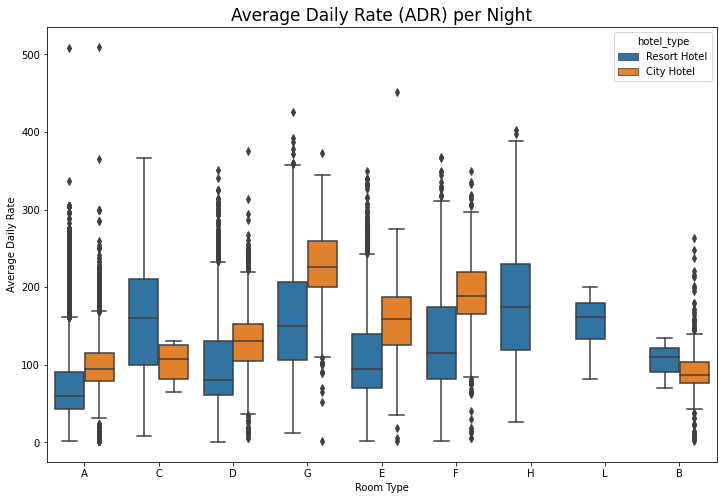

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type", y="adr",data=df_ritz11,
            hue = "hotel_type")
plt.title("Average Daily Rate (ADR) per Night", fontsize = 17 )
plt.xlabel("Room Type")
plt.ylabel("Average Daily Rate")

Dari visualisasi tersebut terlihat ada outlier yang ekstrem dengan harga diatas 500, karena tujuannya hanya untuk mengetahui rata-rata harga per kamar per malam
maka outliernya tidak dibuang.

# **3. How does the price per night vary over the year?**

Agar tidak muncul setting copy warning, buat variabel baru yang hanya berisi 3 kolom yang dibutuhkan karena setelahnya akan
buat list baru dengan nama ordered agar nama bulan pada sumbu x sesuai urutan bulannya.

Text(0, 0.5, 'Average Daily Rate')

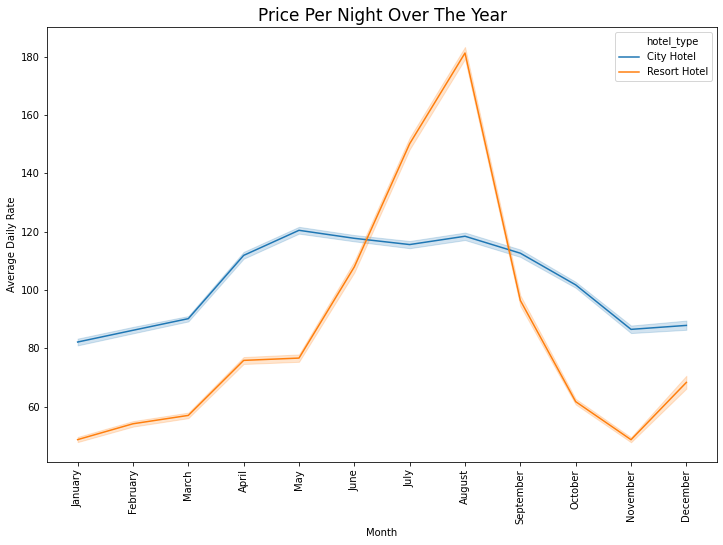

In [59]:
adr_monthly = df_ritz1[["hotel_type", "arrival_date_month", "adr"]].sort_values("arrival_date_month")


ordered = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
adr_monthly["arrival_date_month"] = pd.Categorical(adr_monthly["arrival_date_month"], categories=ordered, ordered=True)


plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel_type", data=adr_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"],sizes=(2.5, 2.5))
plt.xticks(rotation=90)
plt.title("Price Per Night Over The Year", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")

Berdasarkan hasil tersebut harga tertinggi sepanjang tahun ada dibulan agustus.

# **4. Which are the busiest months?**

In [60]:
busiest_month = df_ritz1.groupby("arrival_date_month")["hotel_type"].count()

busiest_month1 = pd.DataFrame({"month": list(busiest_month.index),
                               "total guests": list(busiest_month.values)})

busiest_month1["month"] = pd.Categorical(busiest_month1["month"], categories=ordered, ordered=True)

Text(0, 0.5, 'Average Daily Rate')

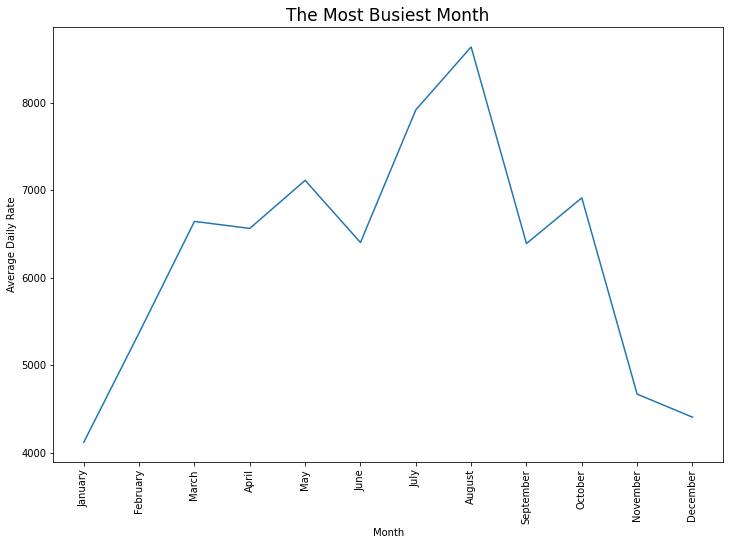

In [61]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="total guests", data=busiest_month1, 
            sizes=(2.5, 2.5))
plt.xticks(rotation=90)
plt.title("The Most Busiest Month", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")

Jumlah check in terbanyak ada pada bulan agustus, sesuai dengan tingginya harga di bulan yang sama, makin tinggi permintaan makin tinggi harga

# **5. How long do people stay at the hotels?**


Untuk mengetahui berapa lama setiap pelanggan menginap di hotel, kita perlu mengetahui jumlah hari stay in weekend night dan stay in week night, 2 kolom ini dipisah karena harga week day dan weekend berbeda sehingga mempengaruhi harga atau nilai pada kolom 'adr'.

In [62]:
resort_hotel  = df_ritz1.loc[df_ritz1['hotel_type']=='Resort Hotel']

city_hotel  = df_ritz1.loc[df_ritz1['hotel_type']=='City Hotel']

In [63]:
resort_hotel['total_night'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']

city_hotel['total_night'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
city_hotel['total_night'].describe()

count    46228.000000
mean         2.923618
std          1.762190
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         57.000000
Name: total_night, dtype: float64

In [65]:
resort_hotel["total_night"].describe()

count    28938.000000
mean         4.142892
std          3.374015
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max         69.000000
Name: total_night, dtype: float64

In [66]:
total_nights_res = list(resort_hotel["total_night"].value_counts().index)
total_bookings_res = list(resort_hotel["total_night"].value_counts())
val_bookings_res = resort_hotel["total_night"].value_counts()

total_nights_cty = list(city_hotel["total_night"].value_counts().index)
total_bookings_cty = list(city_hotel["total_night"].value_counts())
val_bookings_cty = city_hotel["total_night"].value_counts()

resort_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": total_nights_res,
                           "rel_num_bookings": val_bookings_res})

city_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": total_nights_cty,
                           "rel_num_bookings": val_bookings_cty})

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)

In [67]:
fig = px.bar(nights_data, 
             x='num_nights',
             y='rel_num_bookings',
             color = 'hotel',
             barmode = 'group',
             range_x = [0,31],
             labels={
                     "num_nights": "Number of Night",
                     "rel_num_bookings": "Total Booking",
                     "hotel": "Hotel Type"
                 },
                title="Total Day People Stay at Hotel")

fig.update_layout(xaxis = dict(tickmode = 'linear',
                               tick0 = 1,
                               dtick = 1),
                  yaxis = dict(tickmode = 'linear',
                               tick0 = 500,
                               dtick = 500))

fig.show()

# **6. Bookings by market segment**


In [68]:
segment = df_ritz1['market_segment'].value_counts()

segment1 = pd.DataFrame({"market_segment": list(segment.index),
                               "total_booking": list(segment.values)})

segment1

,market_segment,total_booking
0,Online TA,35738
1,Offline TA/TO,15908
2,Direct,10672
3,Groups,7714
4,Corporate,4303
5,Complementary,646
6,Aviation,185


In [69]:
fig = px.bar(segment1, 
             x='market_segment',
             y='total_booking',
             color = 'market_segment',
             labels={
                     "market_segment": "Market Segment",
                     "total_booking": "Total Booking",
                     },
                title="Total Booking Per Market Segment")
fig.show()

# **7. How many bookings were cancelled?**

In [70]:
df_ritz2 = df_ritz['is_canceled'].sum()

df_ritz2

44224

In [71]:
resort_canceled = df_ritz.loc[df_ritz['hotel_type']=='Resort Hotel']['is_canceled'].sum()

resort_canceled

11122

In [72]:
city_canceled = df_ritz.loc[df_ritz['hotel_type']=='City Hotel']['is_canceled'].sum()

city_canceled

33102

In [73]:
canceled_month = df_ritz.loc[df_ritz['is_canceled']==1].groupby("arrival_date_month")["is_canceled"].sum()

canceled_month1 = pd.DataFrame({"month": list(canceled_month.index),
                               "total canceled": list(canceled_month.values)})

canceled_month1["month"] = pd.Categorical(canceled_month1["month"], categories=ordered, ordered=True)

Text(0, 0.5, 'Total Canceled')

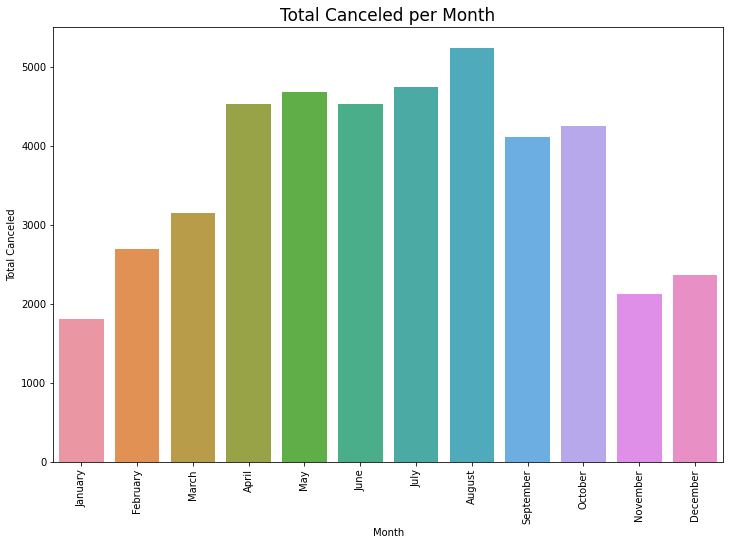

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "month", y="total canceled", data=canceled_month1)
plt.xticks(rotation=90)
plt.title("Total Canceled per Month", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Total Canceled")